# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment 01
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
!pip install ucimlrepo

In [2]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [4]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [5]:
print(f"{data.isna().sum()}\n")

data = data.dropna()
target = target.loc[data.index]

print(data.isna().sum())

COMPACTNESS                         1
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       

### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

У нас очень маленький датасет, поэтому мы не можем позволить себе большую тестовую выборку. Возьмем 20%.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=42,
    stratify=target
)

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676, 1) (169, 18) (169, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [8]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
200,93.0,47,85,163,66,11,156,44,20,158,172,355,178,74,7,15,183,195
396,108.0,57,106,177,51,5,256,26,28,170,285,966,261,87,11,2,182,181
309,109.0,48,107,215,62,10,205,32,23,158,222,624,168,65,9,32,195,206
86,89.0,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200
635,97.0,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186
246,95.0,36,73,191,73,6,156,41,19,126,184,374,124,71,2,19,199,204
782,87.0,44,98,211,70,10,189,35,22,141,214,535,178,71,2,21,187,194
539,109.0,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
698,83.0,42,71,152,64,7,149,45,19,142,172,331,158,74,2,2,184,190
794,87.0,41,76,165,67,7,148,45,19,140,171,327,152,72,7,13,188,195


Methods `describe` and `info` deliver some useful information.

In [9]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.353550,44.788462,81.789941,168.440828,61.741124,8.693787,168.115385,41.106509,20.526627,147.902367,188.020710,435.831361,174.437870,72.576923,6.322485,12.321006,188.809172,195.534024
std,8.214937,6.119156,15.678160,33.935814,8.345653,5.024623,32.876717,7.760520,2.568908,14.480411,30.910904,174.266015,32.083742,7.707140,4.872857,8.982893,6.168064,7.425304
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,68.000000,2.000000,5.000000,184.000000,190.750000
50%,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.500000,360.500000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,99.000000,49.000000,96.500000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,583.250000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 200 to 656
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       676 non-null    float64
 1   CIRCULARITY                       676 non-null    int64  
 2   DISTANCE CIRCULARITY              676 non-null    int64  
 3   RADIUS RATIO                      676 non-null    int64  
 4   PR.AXIS ASPECT RATIO              676 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           676 non-null    int64  
 6   SCATTER RATIO                     676 non-null    int64  
 7   ELONGATEDNESS                     676 non-null    int64  
 8   PR.AXIS RECTANGULARITY            676 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         676 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  676 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  676 non-null    int64  
 12  SCALED RADI

## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Нормализуем данные для правильной работы моделей.

In [13]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Делаем одномерными таргеты.

### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot as skplt
import matplotlib.pyplot as plt

In [15]:
param_grid = {'C' : np.arange(1, 500, 50)}

logreg = LogisticRegression(
    random_state=42,
    solver='saga',
    tol=1e-3,
    max_iter=500
)

cross_val = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
)

cross_val.fit(X_train_scaled, y_train)
c = cross_val.best_params_['C']
c

np.int64(101)

Пробежавшись по сетке, используя кросс-валидацию, лучшим гимперпараметром оказался C = 101.

In [16]:
model = cross_val.best_estimator_

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy, f1

(0.8461538461538461, 0.8437842969615545)

Запустив лучшую модель на тестовых данных получили метрики.

In [17]:
y_proba = model.predict_proba(X_test_scaled)

skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

NameError: name 'skplt' is not defined

In [95]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

#! pip install scikit-plot

### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

Просто натренировали на train

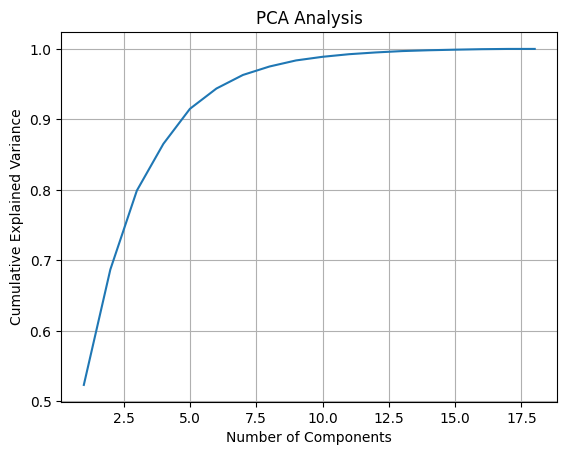

In [22]:
explained_variance = pca.explained_variance_

cum_var = np.cumsum(explained_variance) / np.sum(explained_variance)

plt.plot(range(1, len(cum_var)+1), cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.grid()
plt.show()


График зависимости дисперссии от количества компонент.

### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

Возьмем количество компонент, объясняющих около 95% дисперсии. Примерно 7 компонент. Данные надо нормализовать, но мы это сделали ранее.

In [25]:
pca = PCA(n_components=7)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca.shape, X_test_pca.shape

((676, 7), (169, 7))

Натренирова на train и трансформировали все части данных.

Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [48]:
param_grid = {
    'C' : np.arange(0.01, 5, 0.1),
    'max_iter' : np.arange(1, 1000, 100)
    }

logreg = LogisticRegression(
    random_state=42,
    solver='saga',
    tol=1e-3
)

cross_val = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
)

cross_val.fit(X_train_pca, y_train)
cross_val.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'C': np.float64(0.31000000000000005), 'max_iter': np.int64(101)}

Пробежли по сеткам для C и количества итераций. Получили лучшие гиперпараметры.

In [51]:
best_logreg_model = cross_val.best_estimator_
y_pred = best_logreg_model.predict(X_test_pca)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
accuracy, f1

(0.6272189349112426, 0.6184760800327375)

Метрики, ожидаемо, упали по сравнению с моделью на исходных данных.

In [39]:
y_proba = best_logreg_model.predict_proba(X_test_pca)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

NameError: name 'skplt' is not defined

Просто график.

### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [53]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth' : np.arange(1, 20, 2)
}

tree = DecisionTreeClassifier(random_state=42)

cross_val = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
)

cross_val.fit(X_train_pca, y_train)
cross_val.best_params_

{'max_depth': np.int64(7)}

Все аналогично с логичистической регрессией.

In [57]:
best_tree_model = cross_val.best_estimator_
y_pred = best_tree_model.predict(X_test_pca)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
accuracy, f1

(0.6390532544378699, 0.6447954205039226)

Метрики чуть лучше, чем у лог регрессии.

In [56]:
y_proba = best_tree_model.predict_proba(X_test_pca)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

NameError: name 'skplt' is not defined

### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [46]:
from sklearn.ensemble import BaggingClassifier 

In [67]:
N_grid = np.arange(2, 101, 5)

bag_logreg = BaggingClassifier(
    estimator=best_logreg_model,
    n_estimators=N_grid[-1],
    random_state=42,
    bootstrap=True
)
bag_logreg.fit(X_train_scaled, y_train)

bag_tree = BaggingClassifier(
    estimator=best_tree_model,
    n_estimators=N_grid[-1],
    random_state=42,
    bootstrap=True
)
bag_tree.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=np.int64(7),
                                                   random_state=42),
                  n_estimators=np.int64(97), random_state=42)

In [68]:
accuracy_logreg, f1_logreg = [], []
accuracy_tree, f1_tree = [], []

for N in N_grid:
    y_proba_logreg_list = [
        model.predict_proba(X_test_scaled)
        for model in bag_logreg.estimators_[:N]
    ]
    y_proba_logreg = np.mean(y_proba_logreg_list, axis=0)
    y_idx_logreg = np.argmax(y_proba_logreg, axis=1)
    y_pred_logreg = bag_logreg.classes_[y_idx_logreg]

    accuracy_logreg.append(accuracy_score(y_test, y_pred_logreg))
    f1_logreg.append(f1_score(y_test, y_pred_logreg, average='weighted'))


    y_proba_tree_list = [
        model.predict_proba(X_test_scaled)
        for model in bag_tree.estimators_[:N]
    ]
    y_proba_tree = np.mean(y_proba_tree_list, axis=0)
    y_idx_tree = np.argmax(y_proba_tree, axis=1)
    y_pred_tree = bag_tree.classes_[y_idx_tree]

    accuracy_tree.append(accuracy_score(y_test, y_pred_tree))
    f1_tree.append(f1_score(y_test, y_pred_tree, average='weighted'))

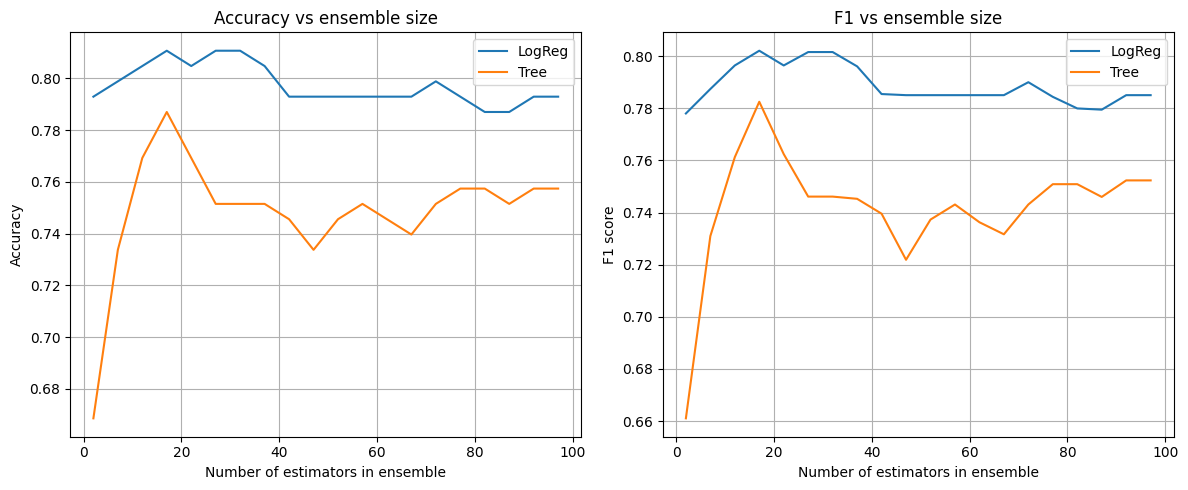

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Левый график — accuracy
axes[0].plot(N_grid, accuracy_logreg, label="LogReg")
axes[0].plot(N_grid, accuracy_tree, label="Tree")
axes[0].set_xlabel("Number of estimators in ensemble")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy vs ensemble size")
axes[0].grid(True)
axes[0].legend(loc='best')

# Правый график — F1
axes[1].plot(N_grid, f1_logreg, label="LogReg")
axes[1].plot(N_grid, f1_tree, label="Tree")
axes[1].set_xlabel("Number of estimators in ensemble")
axes[1].set_ylabel("F1 score")
axes[1].set_title("F1 vs ensemble size")
axes[1].grid(True)
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()


По графикам явно видно, что ансамбли из лог регрессий работают лучше, чем из деревьев. Это как раз подсказывает, что гиперпараметры из пункта 2.5 не оптимальны для использования в ансамбле. Для одиночного дерева мы хотим максимально выжать из него качество, а для ансамбля наоборот - сделать деревья как можно более разнообразными, чтобы они компенсировали ошибки друг друга.

### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
N_grid = np.arange(2, 201, 5)
accuracy_rf_list = []
f1_rf_list = []
best_acc = 0
best_f1 = 0
bestN_acc = 0
bestN_f1 = 0

for n in N_grid:
    random_forest = RandomForestClassifier(n_estimators=n)
    random_forest.fit(X_train_pca, y_train)

    y_proba_rf = random_forest.predict_proba(X_test_pca)
    y_pred_rf = random_forest.predict(X_test_pca)

    accuracy_rf_list.append(accuracy_score(y_test, y_pred_rf))
    f1_rf_list.append(f1_score(y_test, y_pred_rf, average='weighted'))

    if accuracy_rf_list[-1] > best_acc:
        best_acc = accuracy_rf_list[-1]
        bestN_acc = n
    if f1_rf_list[-1] > best_f1:
        best_f1 = f1_rf_list[-1]
        bestN_f1 = n            

In [91]:
bestN_f1, bestN_acc

(np.int64(87), np.int64(87))

По графику из прошлого пункта можно заметить, что оптимальное количество около 20, при этом в random forest оптимальное 87. Это логично, потому что деревья в случайном лесе более рандомные, слабые. Поэтому их нужно больше, чтобы собрать хороший ансамбль.

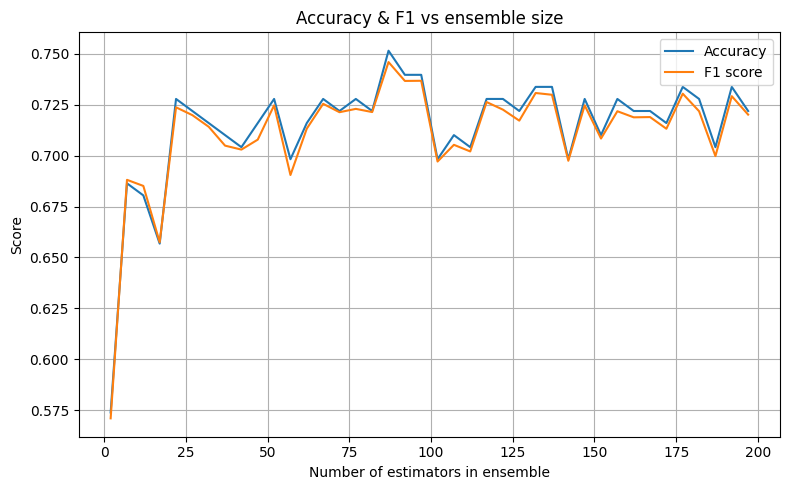

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(N_grid, accuracy_rf_list, label="Accuracy")
plt.plot(N_grid, f1_rf_list, label="F1 score")

plt.xlabel("Number of estimators in ensemble")
plt.ylabel("Score")
plt.title("Accuracy & F1 vs ensemble size")
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

In [106]:
best_random_forest_model = RandomForestClassifier(n_estimators=bestN_f1)

In [112]:
X_parts = np.array_split(X_train_pca, 10)
y_parts = np.array_split(y_train, 10)

acc_logreg, f1_logreg = [], []
acc_tree, f1_tree = [], []
acc_rf, f1_rf = [], []

train_sizes = []

for i in range(10):
    X_sub = np.concatenate(X_parts[:i + 1], axis=0)
    y_sub = np.concatenate(y_parts[:i + 1], axis=0)
    train_sizes.append(len(y_sub))

    best_logreg_model.fit(X_sub, y_sub)
    y_pred = best_logreg_model.predict(X_test_pca)
    acc_logreg.append(accuracy_score(y_test, y_pred))
    f1_logreg.append(f1_score(y_test, y_pred, average='weighted'))

    best_tree_model.fit(X_sub, y_sub)
    y_pred = best_tree_model.predict(X_test_pca)
    acc_tree.append(accuracy_score(y_test, y_pred))
    f1_tree.append(f1_score(y_test, y_pred, average='weighted'))

    best_random_forest_model.fit(X_sub, y_sub)
    y_pred = best_random_forest_model.predict(X_test_pca)
    acc_rf.append(accuracy_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred, average='weighted'))

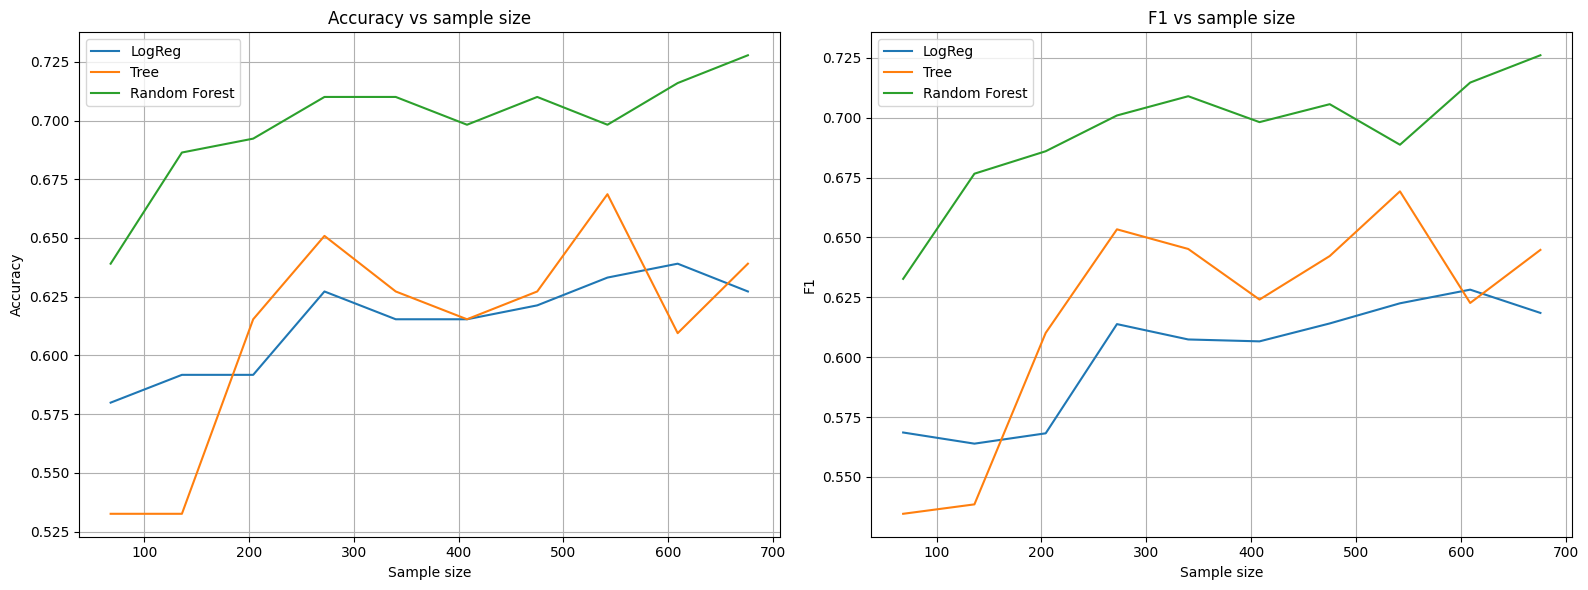

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(train_sizes, acc_logreg, label='LogReg')
axes[0].plot(train_sizes, acc_tree, label='Tree')
axes[0].plot(train_sizes, acc_rf, label='Random Forest')
axes[0].set_xlabel("Sample size")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy vs sample size")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(train_sizes, f1_logreg, label='LogReg')
axes[1].plot(train_sizes, f1_tree, label='Tree')
axes[1].plot(train_sizes, f1_rf, label='Random Forest')
axes[1].set_xlabel("Sample size")
axes[1].set_ylabel("F1")
axes[1].set_title("F1 vs sample size")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


Видим, что random forest заметно лучше двух других моделей. Еще похоже, что лог регрессия успела выйти на плато по качеству, а деревья и случайный лес еще нет. Значит, при увеличении данных качество этих моделей может еще вырасти. У леса "потенциал" в этом смысле больше.

### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* depth of each tree
* number of decision trees
* learning rate

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

gb = GradientBoostingClassifier()

cross_val_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    n_jobs=-1
)

cross_val_gb.fit(X_train_pca, y_train)
cross_val_gb.best_params_

In [ ]:
best_gb = cross_val_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test_pca)

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average="weighted")

acc_gb, f1_gb

In [ ]:
y_proba = best_gb.predict_proba(X_test_pca)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()